# Proyecto Machine Learning

## "Optimización del Rendimiento Laboral: Un Enfoque de Machine Learning en Recursos Humanos"

### "Empleo de Machine Learning en el ámbito de Recursos Humanos para optimizar el rendimiento laboral de los empleados. Se trata de utilizar datos previamente analizados  para crear un modelo predictivo que permita a los profesionales tomar decisiones más informadas y estratégicas en la gestión del talento humano." 

En un entorno empresarial altamente competitivo, la eficiencia y el rendimiento de los empleados son cruciales para el éxito de una organización. Sin embargo, la gestión de recursos humanos a menudo se basa en decisiones subjetivas o enfoques tradicionales. Este proyecto busca transformar la gestión de Recursos Humanos utilizando el poder de los datos y el Machine Learning.

El enfoque comienza con un exhaustivo Análisis Exploratorio de Datos (EDA) que examina las relaciones entre diversas variables, como la edad, la relación con los supervisores, la colaboración entre compañeros, etc. Este análisis proporciona información valiosa sobre qué factores pueden estar influyendo en el rendimiento de los empleados.

Luego, se avanza hacia la creación y entrenamiento de un modelo de Machine Learning. Este modelo se basa en los patrones y relaciones identificados durante el EDA y tiene como objetivo predecir el rendimiento laboral futuro de los empleados. Esto permite a Recursos Humanos identificar de manera proactiva a aquellos empleados que podrían necesitar apoyo adicional o desarrollo.

En última instancia, este proyecto busca ayudar a las organizaciones a retener y aprovechar al máximo su talento humano, mejorando el rendimiento laboral, reduciendo la rotación y brindando una ventaja competitiva en un mercado laboral dinámico. El enfoque de Machine Learning proporciona una forma cuantitativa y basada en datos de abordar los desafíos de la gestión de recursos humanos en la era digital.

# EDA

In [2]:
import pandas as pd

df = pd.read_csv("../Data/raw/EDA.csv", encoding='latin1')

df.head()

/var/folders/gn/fdryr4k17t95s1_9lf01ghfw0000gn/T/ipykernel_31285/210416874.py:3: DtypeWarning: Columns (35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/raw/EDA.csv", encoding='latin1')


,sub_ID,sub_fname,sub_lname,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_coll_IDs,sub_colls_same_sex_prtn,...,event_weekday_num,event_weekday_name,behav_comptype_h,behav_cause_h,actual_efficacy_h,record_comptype,record_cause,recorded_efficacy,recorded_note_from_sup,record_conf_matrix_h
0,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Presence,NaN,NaN,Presence,NaN,NaN,NaN,NaN
1,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Efficacy,NaN,1.489,Efficacy,NaN,1.2,NaN,NaN
2,98000002,Joan,Winter,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Presence,NaN,NaN,Presence,NaN,NaN,NaN,NaN
3,98000002,Joan,Winter,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Efficacy,NaN,1.023,Efficacy,NaN,0.8,NaN,NaN
4,98000003,Elizabeth,Martinez,20,F,Shift 1,Team 3,Team Leader,"[98000001, 98000002, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Presence,NaN,NaN,Presence,NaN,NaN,NaN,NaN


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411948 entries, 0 to 411947
Data columns (total 42 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   sub_ID                   411948 non-null  int64  
 1   sub_fname                411948 non-null  object 
 2   sub_lname                411948 non-null  object 
 3   sub_age                  411948 non-null  int64  
 4   sub_sex                  411948 non-null  object 
 5   sub_shift                411948 non-null  object 
 6   sub_team                 411948 non-null  object 
 7   sub_role                 411948 non-null  object 
 8   sub_coll_IDs             411136 non-null  object 
 9   sub_colls_same_sex_prtn  410957 non-null  float64
 10  sub_health_h             411948 non-null  float64
 11  sub_commitment_h         411948 non-null  float64
 12  sub_perceptiveness_h     411948 non-null  float64
 13  sub_dexterity_h          411948 non-null  float64
 14  sub_

In [51]:
df.describe()

,sub_ID,sub_age,sub_colls_same_sex_prtn,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,...,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,event_week_in_series,event_day_in_series,event_weekday_num,actual_efficacy_h,recorded_efficacy
count,4.119480e+05,411948.000000,410957.000000,411948.000000,411948.000000,411948.000000,411948.000000,411948.000000,411948.000000,411948.000000,...,411136.000000,411136.000000,411136.000000,411136.000000,411136.000000,411948.000000,411948.000000,411948.000000,191657.000000,191272.000000
mean,9.800036e+07,41.395637,0.502392,0.747096,0.751878,0.742695,0.741493,0.738500,0.738413,0.735608,...,39.876939,-1.525405,0.750638,0.730454,0.709282,39.509902,274.167562,2.000959,0.669063,0.668879
std,2.076600e+02,13.735554,0.127081,0.154026,0.147780,0.158803,0.149493,0.162415,0.146933,0.164769,...,14.081894,19.397769,0.139544,0.175733,0.161476,22.513467,157.607908,1.415252,0.396246,0.413077
min,9.800000e+07,18.000000,0.000000,0.153000,0.172000,0.169000,0.240000,0.152000,0.290000,0.215000,...,18.000000,-45.000000,0.437000,0.384000,0.346000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,9.800019e+07,29.000000,0.421053,0.655000,0.653000,0.644000,0.646000,0.639000,0.635000,0.623000,...,28.000000,-17.000000,0.629000,0.659000,0.572000,20.000000,138.000000,1.000000,0.410000,0.400000
50%,9.800036e+07,41.000000,0.473684,0.765000,0.764000,0.763000,0.761000,0.755000,0.754000,0.760000,...,38.000000,0.000000,0.747000,0.745000,0.686000,40.000000,274.000000,2.000000,0.615000,0.600000
75%,9.800053e+07,53.000000,0.578947,0.859000,0.867000,0.868000,0.859000,0.864000,0.851000,0.870000,...,53.000000,13.000000,0.868000,0.909000,0.840000,59.000000,411.000000,3.000000,0.874000,0.900000
max,9.800079e+07,65.000000,0.789474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999000,...,62.000000,43.000000,1.000000,0.999000,0.985000,78.000000,546.000000,5.000000,3.763000,4.100000


In [52]:
df.shape

(411948, 42)

In [53]:
# Columnas:

# columnas_total = ['sub_ID', 'sub_fname', 'sub_lname', 'sub_age', 'sub_sex', 'sub_shift', 'sub_team', 'sub_role', 
# 'sub_coll_IDs', 'sub_colls_same_sex_prtn', 'sub_health_h', 'sub_commitment_h', 'sub_perceptiveness_h', 
# 'sub_dexterity_h', 'sub_sociality_h', 'sub_goodness_h', 'sub_strength_h', 'sub_openmindedness_h', 
# 'sub_workstyle_h', 'sup_ID', 'sup_fname', 'sup_lname', 'sup_age', 'sup_sub_age_diff', 'sup_sex', 
# 'sup_role', 'sup_commitment_h', 'sup_perceptiveness_h', 'sup_goodness_h', 'event_date', 'event_week_in_series', 
# 'event_day_in_series', 'event_weekday_num', 'event_weekday_name', 'behav_comptype_h', 'behav_cause_h', 
# 'actual_efficacy_h', 'record_comptype', 'record_cause', 'recorded_efficacy', 'recorded_note_from_sup', 
# 'record_conf_matrix_h']

In [54]:
columns = ['sub_ID', 'sub_fname', 'sub_lname', 'sub_age', 'sub_sex', 'sub_shift', 'sub_team', 'sub_role', 'sub_coll_IDs', 'sub_colls_same_sex_prtn', 'sub_health_h', 'sub_commitment_h', 'sub_perceptiveness_h', 'sub_dexterity_h', 'sub_sociality_h', 'sub_goodness_h', 'sub_strength_h', 'sub_openmindedness_h', 'sub_workstyle_h', 'sup_ID', 'sup_fname', 'sup_lname', 'sup_age', 'sup_sub_age_diff', 'sup_sex', 'sup_role', 'sup_commitment_h', 'sup_perceptiveness_h', 'sup_goodness_h', 'event_date', 'event_week_in_series', 'event_day_in_series', 'event_weekday_num', 'event_weekday_name', 'behav_comptype_h', 'behav_cause_h', 'actual_efficacy_h', 'record_comptype', 'record_cause', 'recorded_efficacy', 'recorded_note_from_sup', 'record_conf_matrix_h']

df[columns].isnull().sum()

sub_ID                          0
sub_fname                       0
sub_lname                       0
sub_age                         0
sub_sex                         0
sub_shift                       0
sub_team                        0
sub_role                        0
sub_coll_IDs                  812
sub_colls_same_sex_prtn       991
sub_health_h                    0
sub_commitment_h                0
sub_perceptiveness_h            0
sub_dexterity_h                 0
sub_sociality_h                 0
sub_goodness_h                  0
sub_strength_h                  0
sub_openmindedness_h            0
sub_workstyle_h                 0
sup_ID                        812
sup_fname                     812
sup_lname                     812
sup_age                       812
sup_sub_age_diff              812
sup_sex                       812
sup_role                      812
sup_commitment_h              812
sup_perceptiveness_h          812
sup_goodness_h                812
event_date    

In [55]:
df = df[(df['record_comptype'].str.contains('Efficacy') | df['record_cause'].str.contains('Efficacy'))]
df.head()

,sub_ID,sub_fname,sub_lname,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_coll_IDs,sub_colls_same_sex_prtn,...,event_weekday_num,event_weekday_name,behav_comptype_h,behav_cause_h,actual_efficacy_h,record_comptype,record_cause,recorded_efficacy,recorded_note_from_sup,record_conf_matrix_h
1,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Efficacy,NaN,1.489,Efficacy,NaN,1.2,NaN,NaN
3,98000002,Joan,Winter,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Efficacy,NaN,1.023,Efficacy,NaN,0.8,NaN,NaN
5,98000003,Elizabeth,Martinez,20,F,Shift 1,Team 3,Team Leader,"[98000001, 98000002, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Efficacy,NaN,0.997,Efficacy,NaN,0.9,NaN,NaN
8,98000004,Alice,Zimmerman,18,F,Shift 1,Team 4,Team Leader,"[98000001, 98000002, 98000003, 98000005, 98000...",0.714286,...,4,Friday,Efficacy,NaN,0.883,Efficacy,NaN,0.9,NaN,NaN
10,98000005,Karen,Bauer,59,F,Shift 1,Team 5,Team Leader,"[98000001, 98000002, 98000003, 98000004, 98000...",0.714286,...,4,Friday,Efficacy,NaN,0.108,Efficacy,NaN,0.1,NaN,NaN


In [56]:
df = df[df['sub_role'] != 'Production Director']

In [57]:
df[columns].isnull().sum()

sub_ID                          0
sub_fname                       0
sub_lname                       0
sub_age                         0
sub_sex                         0
sub_shift                       0
sub_team                        0
sub_role                        0
sub_coll_IDs                    0
sub_colls_same_sex_prtn         0
sub_health_h                    0
sub_commitment_h                0
sub_perceptiveness_h            0
sub_dexterity_h                 0
sub_sociality_h                 0
sub_goodness_h                  0
sub_strength_h                  0
sub_openmindedness_h            0
sub_workstyle_h                 0
sup_ID                          0
sup_fname                       0
sup_lname                       0
sup_age                         0
sup_sub_age_diff                0
sup_sex                         0
sup_role                        0
sup_commitment_h                0
sup_perceptiveness_h            0
sup_goodness_h                  0
event_date    

In [58]:
# Columnas que se emplearán en el estudio:

# columns = ['sub_ID', 'sub_age', 'sub_sex', 'sub_shift', 'sub_team', 'sub_role', 'sub_health_h', 'sub_commitment_h', 'sub_perceptiveness_h', 'sub_dexterity_h', 'sub_sociality_h', 'sub_goodness_h', 'sub_strength_h', 'sub_openmindedness_h', 'sub_workstyle_h', 'event_weekday_name', 'actual_efficacy_h']

In [59]:
columns = ['sub_ID', 'sub_age', 'sub_sex', 'sub_shift', 'sub_role', 'sub_health_h', 'sub_commitment_h', 'sub_perceptiveness_h', 'sub_dexterity_h', 'sub_sociality_h', 'sub_goodness_h', 'sub_strength_h', 'sub_openmindedness_h', 'sub_workstyle_h', 'event_weekday_name', 'actual_efficacy_h']

df = df.loc[:, columns]

df.head()


,sub_ID,sub_age,sub_sex,sub_shift,sub_role,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sub_workstyle_h,event_weekday_name,actual_efficacy_h
1,98000001,40,F,Shift 1,Team Leader,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,Group A,Friday,1.489
3,98000002,61,F,Shift 1,Team Leader,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,Group C,Friday,1.023
5,98000003,20,F,Shift 1,Team Leader,0.573,0.907,0.735,0.878,0.985,0.840,0.900,0.777,Group C,Friday,0.997
8,98000004,18,F,Shift 1,Team Leader,0.547,0.819,0.659,0.776,0.556,0.755,0.872,0.382,Group D,Friday,0.883
10,98000005,59,F,Shift 1,Team Leader,0.777,0.629,0.678,0.749,0.652,0.686,0.566,0.336,Group C,Friday,0.108


In [60]:
df.isnull().sum()

sub_ID                   0
sub_age                  0
sub_sex                  0
sub_shift                0
sub_role                 0
sub_health_h             0
sub_commitment_h         0
sub_perceptiveness_h     0
sub_dexterity_h          0
sub_sociality_h          0
sub_goodness_h           0
sub_strength_h           0
sub_openmindedness_h     0
sub_workstyle_h          0
event_weekday_name       0
actual_efficacy_h       13
dtype: int64

In [61]:
# Imputar los valores faltantes en 'actual_efficacy_h' con la mediana
median_value = df['actual_efficacy_h'].median()
df['actual_efficacy_h'].fillna(median_value, inplace=True)

In [62]:
df.isnull().sum()

sub_ID                  0
sub_age                 0
sub_sex                 0
sub_shift               0
sub_role                0
sub_health_h            0
sub_commitment_h        0
sub_perceptiveness_h    0
sub_dexterity_h         0
sub_sociality_h         0
sub_goodness_h          0
sub_strength_h          0
sub_openmindedness_h    0
sub_workstyle_h         0
event_weekday_name      0
actual_efficacy_h       0
dtype: int64

# Machine Learning

### Transformación de Datos

In [63]:
import numpy as np

# Convertir la columna 'sub_shift' a formato numérico 
df['sub_shift'] = df['sub_shift'].str.replace('Shift', '').astype(int)

In [64]:
# Definir un diccionario de mapeo de categorías a valores numéricos
mapeo = {'Group A': 1, 'Group B': 2, 'Group C': 3, 'Group D': 4, 'Group E': 5}

# Aplicar el mapeo a la columna 'sub_workstyle_h'
df['sub_workstyle_h'] = df['sub_workstyle_h'].map(mapeo)

In [65]:
df['sub_role'].unique()

array(['Team Leader', 'Laborer', 'Shift Manager'], dtype=object)

In [66]:
# Definir un diccionario de mapeo de roles a valores numéricos
mapeo_roles = {'Laborer': 1, 'Team Leader': 2, 'Shift Manager': 3}

# Aplicar el mapeo a la columna 'sub_role'
df['sub_role'] = df['sub_role'].map(mapeo_roles)

In [67]:
df['event_weekday_name'].unique() 

array(['Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday'],
      dtype=object)

In [68]:
# Definir un diccionario de mapeo de días de la semana a valores numéricos
mapeo_dias = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6}

# Aplicar el mapeo a la columna 'event_weekday_name'
df['event_weekday_name'] = df['event_weekday_name'].map(mapeo_dias)

In [69]:
df.head()

,sub_ID,sub_age,sub_sex,sub_shift,sub_role,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sub_workstyle_h,event_weekday_name,actual_efficacy_h
1,98000001,40,F,1,2,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,1,5,1.489
3,98000002,61,F,1,2,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,3,5,1.023
5,98000003,20,F,1,2,0.573,0.907,0.735,0.878,0.985,0.840,0.900,0.777,3,5,0.997
8,98000004,18,F,1,2,0.547,0.819,0.659,0.776,0.556,0.755,0.872,0.382,4,5,0.883
10,98000005,59,F,1,2,0.777,0.629,0.678,0.749,0.652,0.686,0.566,0.336,3,5,0.108


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['sub_sex'] = label_encoder.fit_transform(df['sub_sex'])

In [ ]:
df.head()

,sub_ID,sub_age,sub_sex,sub_shift,sub_role,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sub_workstyle_h,event_weekday_name,actual_efficacy_h
1,98000001,40,0,1,2,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,1,5,1.489
3,98000002,61,0,1,2,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,3,5,1.023
5,98000003,20,0,1,2,0.573,0.907,0.735,0.878,0.985,0.840,0.900,0.777,3,5,0.997
8,98000004,18,0,1,2,0.547,0.819,0.659,0.776,0.556,0.755,0.872,0.382,4,5,0.883
10,98000005,59,0,1,2,0.777,0.629,0.678,0.749,0.652,0.686,0.566,0.336,3,5,0.108


## Regresión:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Dividir los datos en características (X) y la variable objetivo (y)
X = df.drop('actual_efficacy_h', axis=1)  # Características
y = df['actual_efficacy_h']  # Variable objetivo

# Dividir en conjuntos de entrenamiento y prueba (por ejemplo, 80% para entrenamiento, 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train, y_train para entrenamiento y X_test, y_test para prueba

In [ ]:
# Crear un modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_regresion.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el Coeficiente de Determinación (R^2)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Error Cuadrático Medio (MSE):", mse)
print("Error Absoluto Medio (MAE):", mae)
print("Coeficiente de Determinación (R^2):", r2)


Error Absoluto Medio (MAE): 0.2808600963977386
Coeficiente de Determinación (R^2): 0.09987442958751047


In [ ]:
modelo_regresion.coef_

array([-1.05103798e-05,  3.12566071e-03,  5.41768576e-03,  7.16190395e-03,
       -2.14629962e-02,  2.22449086e-02,  8.01368864e-02, -8.95948871e-02,
       -2.03185662e-03, -2.83534859e-02,  4.67494360e-02, -5.55286924e-02,
        1.29845804e-03, -6.89685823e-02,  4.67603424e-02])

In [ ]:
modelo_regresion.intercept_

1030.6232486909737

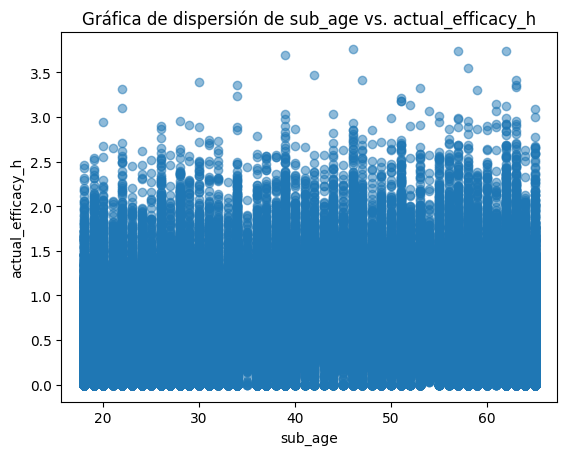

In [ ]:
import matplotlib.pyplot as plt

# Escoge la característica de interés y la variable objetivo
feature_of_interest = 'sub_age'

# Hacer una gráfica de dispersión de la característica vs. variable objetivo
plt.scatter(X[feature_of_interest], y, alpha=0.5)
plt.title(f'Gráfica de dispersión de {feature_of_interest} vs. actual_efficacy_h')
plt.xlabel(feature_of_interest)
plt.ylabel('actual_efficacy_h')

# Mostrar la gráfica
plt.show()


## Regresión Logística

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dividir los datos en características (X) y la variable objetivo (y)
X = df.drop('actual_efficacy_h', axis=1)  # Características
y = df['actual_efficacy_h'] > 0.5  # Variable objetivo binaria (ejemplo: si es mayor que 0.5, True, de lo contrario, False)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Crear y entrenar el modelo de regresión logística
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_train, y_train)


LogisticRegression()

In [ ]:

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_logistico.predict(X_test)


In [ ]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir métricas de evaluación
print(f'Exactitud (Accuracy): {accuracy:.2f}')
print(f'Matriz de Confusión:\n{conf_matrix}')
print(f'Reporte de Clasificación:\n{classification_rep}')

Exactitud (Accuracy): 0.64
Matriz de Confusión:
[[    0 13841]
 [    0 24416]]
Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00     13841
        True       0.64      1.00      0.78     24416

    accuracy                           0.64     38257
   macro avg       0.32      0.50      0.39     38257
weighted avg       0.41      0.64      0.50     38257



/Users/usuario/miniconda3/envs/ramp_up_py395/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/usuario/miniconda3/envs/ramp_up_py395/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/usuario/miniconda3/envs/ramp_up_py395/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
modelo_logistico.coef_

array([[ 5.94784095e-09,  3.48698709e-15,  4.91427764e-18,
         1.39842446e-16,  6.18825598e-17,  4.84110959e-17,
         4.77083454e-17,  4.16774422e-17,  4.66651504e-17,
         4.13199834e-17,  4.88958234e-17,  3.82099824e-17,
         4.32360676e-17, -9.85322453e-17,  3.32499977e-16]])

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Dividir los datos en características (X) y la variable objetivo (y)
X = df.drop('actual_efficacy_h', axis=1)  # Características
y = df['actual_efficacy_h']  # Variable objetivo

# Dividir en conjuntos de entrenamiento y prueba (por ejemplo, 80% para entrenamiento, 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Crear el modelo de árbol de regresión
modelo_arbol_regresion = DecisionTreeRegressor()

# Entrenar el modelo con los datos de entrenamiento
modelo_arbol_regresion.fit(X_train, y_train)



DecisionTreeRegressor()

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_arbol = modelo_arbol_regresion.predict(X_test)




In [ ]:
# Calcular métricas de regresión
mse = mean_squared_error(y_test, y_pred_arbol)
mae = mean_absolute_error(y_test, y_pred_arbol)
r2 = r2_score(y_test, y_pred_arbol)

# Imprimir métricas
print("Error Cuadrático Medio (MSE):", mse)
print("Error Absoluto Medio (MAE):", mae)
print("Coeficiente de Determinación (R^2):", r2)

Error Absoluto Medio (MAE): 0.2613027164430014
Coeficiente de Determinación (R^2): 0.19796902546027262


In [ ]:
# Cross-validation

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

# Crear el modelo de árbol de regresión
modelo_arbol_regresion = DecisionTreeRegressor()

# Definir la métrica de evaluación (en este caso, el error cuadrático medio - MSE)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Definir la estrategia de validación cruzada (k-fold, por ejemplo)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Dividir en 5 partes con mezcla aleatoria

# Realizar la validación cruzada y obtener los resultados (MSE en este caso)
scores = cross_val_score(modelo_arbol_regresion, X, y, cv=kf, scoring=scorer)

# Calcular el promedio de los MSE obtenidos en cada iteración
mse_promedio = -scores.mean()

# Imprimir el MSE promedio
print("Error Cuadrático Medio (MSE) promedio:", mse_promedio)


Error Cuadrático Medio (MSE) promedio: 0.1262064120703693


In [ ]:
#Hipermparámetros

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Dividir los datos en características (X) y la variable objetivo (y)
X = df.drop('actual_efficacy_h', axis=1)  # Características
y = df['actual_efficacy_h']  # Variable objetivo

# Dividir en conjuntos de entrenamiento y prueba (por ejemplo, 80% para entrenamiento, 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de regresión
modelo_arbol_regresion = DecisionTreeRegressor()

# Definir los hiperparámetros a ajustar
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en un nodo hoja
}

# Realizar una búsqueda de cuadrícula para encontrar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(estimator=modelo_arbol_regresion, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y hiperparámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", best_params)

# Entrenar el mejor modelo con los datos de entrenamiento
best_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred_arbol = best_model.predict(X_test)

# Calcular métricas de regresión con el mejor modelo
mse = mean_squared_error(y_test, y_pred_arbol)
mae = mean_absolute_error(y_test, y_pred_arbol)
r2 = r2_score(y_test, y_pred_arbol)

# Imprimir métricas
print("Error Absoluto Medio (MAE):", mae)
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Error Absoluto Medio (MAE): 0.26135501789936744
Error Cuadrático Medio (MSE): 0.12586273778550544
Coeficiente de Determinación (R^2): 0.1987609143094632


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Dividir los datos en características (X) y la variable objetivo (y)
X = df.drop('actual_efficacy_h', axis=1)  # Características
y = df['actual_efficacy_h']  # Variable objetivo

In [ ]:
# Dividir en conjuntos de entrenamiento y prueba (por ejemplo, 80% para entrenamiento, 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest para regresión
modelo_random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Entrenar el modelo con los datos de entrenamiento
modelo_random_forest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_random_forest = modelo_random_forest.predict(X_test)



In [ ]:
# Calcular métricas de regresión
mse = mean_squared_error(y_test, y_pred_random_forest)
mae = mean_absolute_error(y_test, y_pred_random_forest)
r2 = r2_score(y_test, y_pred_random_forest)

# Imprimir métricas
print("Error Cuadrático Medio (MSE):", mse)
print("Error Absoluto Medio (MAE):", mae)
print("Coeficiente de Determinación (R^2):", r2)

Error Cuadrático Medio (MSE): 0.12582153916130023
Error Absoluto Medio (MAE): 0.26125513095061664
Coeficiente de Determinación (R^2): 0.19902318373543193


## SVM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Dividir los datos en características (X) y la variable objetivo (y)
X = df.drop('actual_efficacy_h', axis=1)  # Características
y = df['actual_efficacy_h']  # Variable objetivo

# Dividir en conjuntos de entrenamiento y prueba (por ejemplo, 80% para entrenamiento, 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear un modelo de SVM (RBF)
modelo_svm_regresion = SVR(kernel="rbf")
modelo_svm_regresion.fit(X_train, y_train)

SVR()

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelo_svm_regresion.predict(X_test)

Error Cuadrático Medio (MSE): 0.15933783314572936
Error Absoluto Medio (MAE): 0.297266565351973


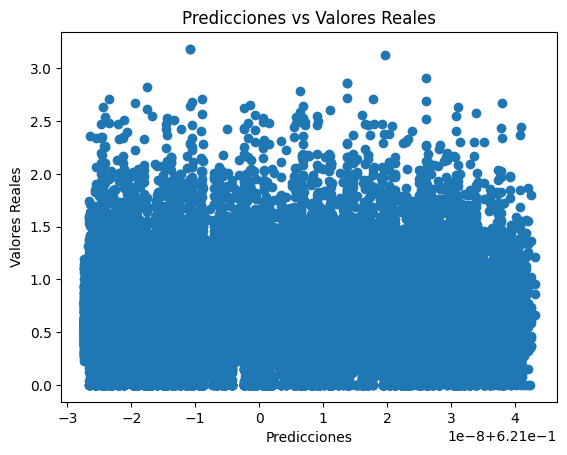

In [ ]:
# Calcular el error cuadrático medio (MSE)
mse = np.mean((y_pred - y_test) ** 2)
print("Error Cuadrático Medio (MSE):", mse)

# Calcular el error absoluto medio (MAE)
mae = np.mean(np.abs(y_pred - y_test))
print("Error Absoluto Medio (MAE):", mae)

# Visualizar las predicciones frente a los valores reales en un gráfico de dispersión
plt.scatter(y_pred, y_test)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Predicciones vs Valores Reales')
plt.show()

## Modelos con regularización (Ridge y Lasso)
### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Crear el modelo Ridge con un valor de alfa específico
alfa = 1.0  
modelo_ridge = Ridge(alpha=alfa)

# Entrenar el modelo con los datos de entrenamiento
modelo_ridge.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_ridge = modelo_ridge.predict(X_test)

# Calcular métricas de regresión para evaluar el rendimiento
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)


print("Error Absoluto Medio (MAE):", mae_ridge)
print("Coeficiente de Determinación (R^2):", r2_ridge)


Error Absoluto Medio (MAE): 0.2808600395021824
Coeficiente de Determinación (R^2): 0.09987453116743772


### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Crear el modelo Lasso con un valor de alfa específico
alfa = 1.0  
modelo_lasso = Lasso(alpha=alfa)

# Entrenar el modelo con los datos de entrenamiento
modelo_lasso.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_lasso = modelo_lasso.predict(X_test)

# Calcular métricas de regresión para evaluar el rendimiento
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression:")
print("Error Cuadrático Medio (MSE):", mse_lasso)
print("Error Absoluto Medio (MAE):", mae_lasso)
print("Coeficiente de Determinación (R^2):", r2_lasso)


Lasso Regression:
Error Cuadrático Medio (MSE): 0.15708574721306165
Error Absoluto Medio (MAE): 0.30086892876522275
Coeficiente de Determinación (R^2): -3.993926333878406e-06
